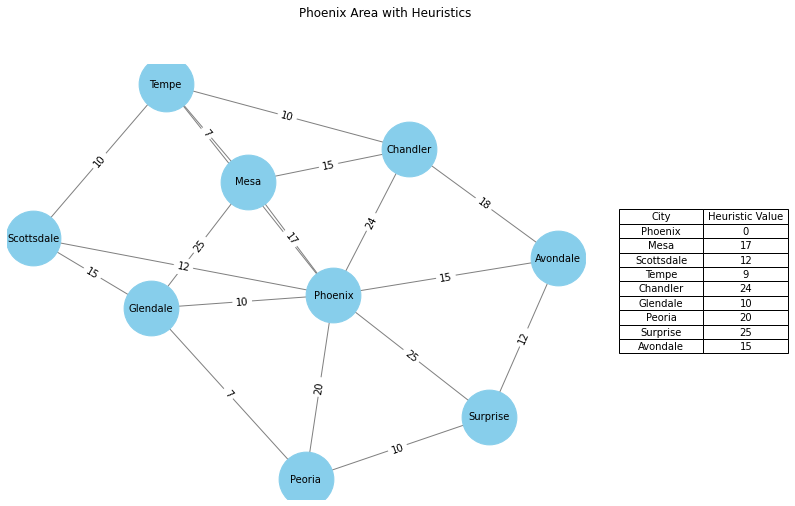

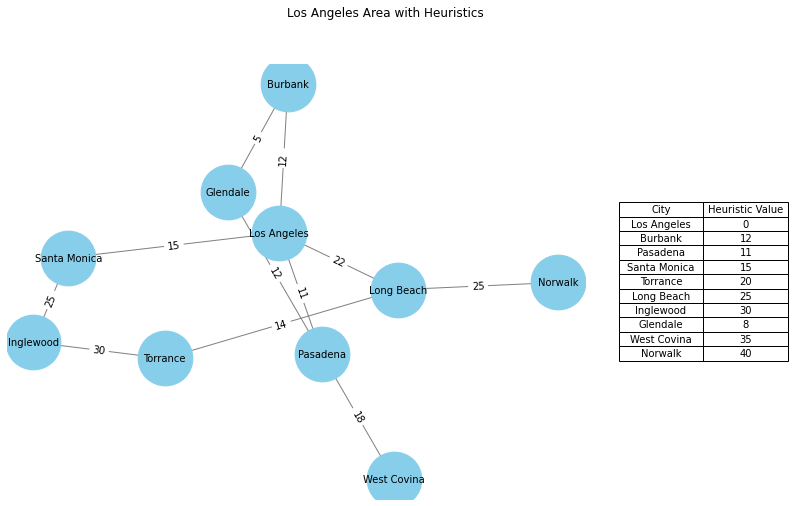

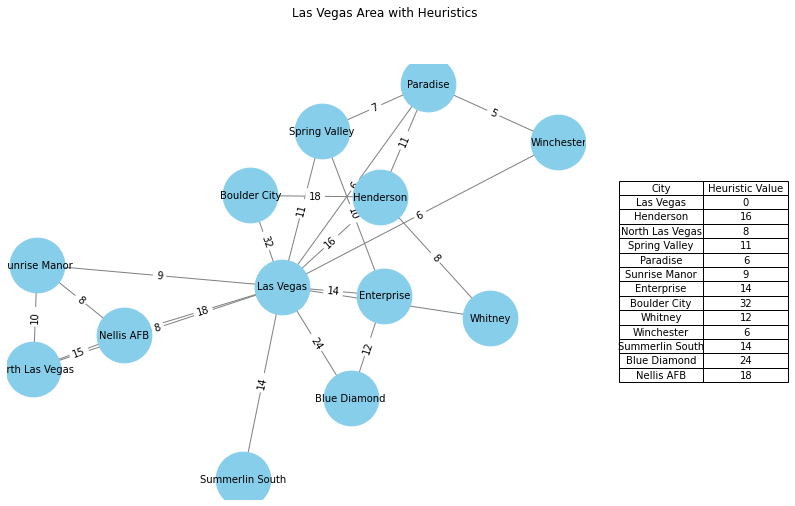

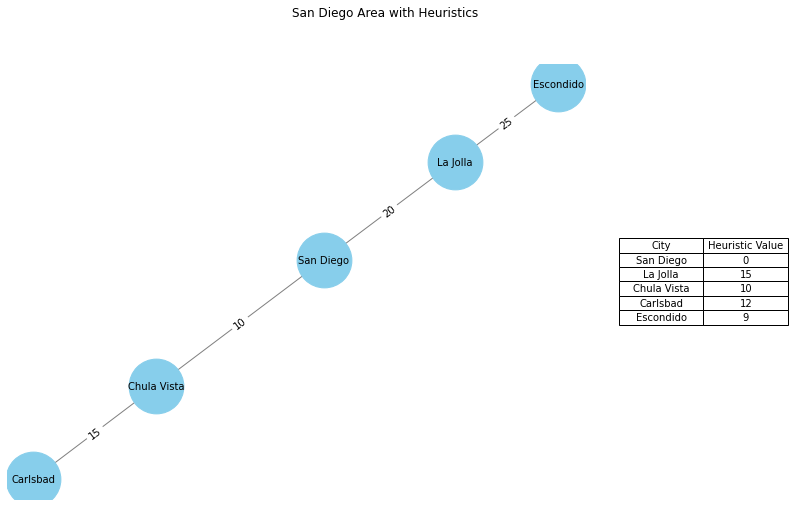

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Define the city dictionaries
Phoenix_cities = {
    'Phoenix': {'Mesa': 17, 'Scottsdale': 12, 'Tempe': 9, 'Chandler': 24, 'Glendale': 10, 'Peoria': 20, 'Surprise': 25, 'Avondale': 15},
    'Mesa': {'Phoenix': 17, 'Tempe': 7, 'Chandler': 15, 'Glendale': 25},
    'Scottsdale': {'Phoenix': 12, 'Tempe': 10, 'Glendale': 15},
    'Tempe': {'Phoenix': 9, 'Mesa': 7, 'Chandler': 10, 'Scottsdale': 10},
    'Chandler': {'Phoenix': 24, 'Mesa': 15, 'Tempe': 10, 'Avondale': 18},
    'Glendale': {'Phoenix': 10, 'Scottsdale': 15, 'Peoria': 7, 'Mesa': 25},
    'Peoria': {'Phoenix': 20, 'Glendale': 7, 'Surprise': 10},
    'Surprise': {'Phoenix': 25, 'Peoria': 10, 'Avondale': 12},
    'Avondale': {'Phoenix': 15, 'Chandler': 18, 'Surprise': 12}
}

Phoenix_heuristics = {
    'Phoenix': 0,
    'Mesa': 17,
    'Scottsdale': 12,
    'Tempe': 9,
    'Chandler': 24,
    'Glendale': 10,
    'Peoria': 20,
    'Surprise': 25,
    'Avondale': 15
}

Los_Angeles_cities = {
    'Los Angeles': {'Burbank': 12,'Pasadena': 11,'Santa Monica': 15,'Long Beach': 22,},
    'Burbank': {'Los Angeles': 12,'Glendale': 5,},
    'Pasadena': {'Los Angeles': 11,'Glendale': 12, 'West Covina': 18,},
    'Santa Monica': {'Los Angeles': 15,'Inglewood': 25,},
    'Torrance': {'Long Beach': 14,'Inglewood': 30,},
    'Long Beach': {'Los Angeles': 22,'Torrance': 14, 'Norwalk': 25,},
    'Inglewood': {'Santa Monica': 25,'Torrance': 30,},
    'Glendale': {'Burbank': 5,'Pasadena': 12,},
    'West Covina': {'Pasadena': 18,},
    'Norwalk': {'Long Beach': 25,}
}

Los_Angeles_heuristics = {
    'Los Angeles': 0,                  
    'Burbank': 12,                     
    'Pasadena': 11,                    
    'Santa Monica': 15,                
    'Torrance': 20,                    
    'Long Beach': 25,                  
    'Inglewood': 30,                   
    'Glendale': 8,                     
    'West Covina': 35,                 
    'Norwalk': 40                      
}

Las_Vegas_cities = {
    'Las Vegas': {'Henderson': 16, 'North Las Vegas': 8, 'Spring Valley': 11, 'Paradise': 6, 'Sunrise Manor': 9, 'Enterprise': 14, 
                  'Boulder City': 32, 'Whitney': 12, 'Winchester': 6, 'Summerlin South': 14, 'Blue Diamond': 24, 'Nellis AFB': 18},
    'Henderson': {'Las Vegas': 16, 'Boulder City': 18, 'Whitney': 8, 'Paradise': 11},
    'North Las Vegas': {'Las Vegas': 8, 'Sunrise Manor': 10, 'Nellis AFB': 15},
    'Spring Valley': {'Las Vegas': 11, 'Paradise': 7, 'Enterprise': 10},
    'Paradise': {'Las Vegas': 6, 'Spring Valley': 7, 'Henderson': 11, 'Winchester': 5},
    'Sunrise Manor': {'Las Vegas': 9, 'North Las Vegas': 10, 'Nellis AFB': 8},
    'Enterprise': {'Las Vegas': 14, 'Spring Valley': 10, 'Blue Diamond': 12},
    'Boulder City': {'Las Vegas': 32, 'Henderson': 18},
    'Whitney': {'Las Vegas': 12, 'Henderson': 8},
    'Winchester': {'Las Vegas': 6, 'Paradise': 5},
    'Summerlin South': {'Las Vegas': 14},
    'Blue Diamond': {'Las Vegas': 24, 'Enterprise': 12},
    'Nellis AFB': {'Las Vegas': 18, 'North Las Vegas': 15, 'Sunrise Manor': 8}
}

Las_Vegas_heuristics = {
    'Las Vegas': 0,
    'Henderson': 16,
    'North Las Vegas': 8,
    'Spring Valley': 11,
    'Paradise': 6,
    'Sunrise Manor': 9,
    'Enterprise': 14,
    'Boulder City': 32,
    'Whitney': 12,
    'Winchester': 6,
    'Summerlin South': 14,
    'Blue Diamond': 24,
    'Nellis AFB': 18
}

San_Diego_cities = {
    'San Diego': { 'La Jolla': 20, 'Chula Vista': 10,},
    'La Jolla': {'San Diego': 20, 'Escondido': 25},
    'Chula Vista': {'San Diego': 10, 'Carlsbad': 15},
    'Carlsbad': {'Chula Vista': 15,},
    'Escondido': {'La Jolla': 25}
}

San_Diego_heuristics = {
    'San Diego': 0,                      
    'La Jolla': 15,                
    'Chula Vista': 10,      
    'Carlsbad': 12,               
    'Escondido': 9                   
}

# Function to draw graph and heuristic table with adjusted proportions
def draw_city_graph_and_heuristics(city_dict, heuristics, title):
    # Create a graph object
    G = nx.Graph()
    for city, neighbors in city_dict.items():
        for neighbor, distance in neighbors.items():
            G.add_edge(city, neighbor, weight=distance)

    # Set up figure with subplots for the graph and heuristic table
    fig = plt.figure(figsize=(14, 8))
    ax1 = plt.subplot2grid((1, 4), (0, 0), colspan=3)  
    ax2 = plt.subplot2grid((1, 4), (0, 3))  

    # Draw the graph on the left
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, ax=ax1, node_size=3000, node_color='skyblue', font_size=10, edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)

    # Create and display the heuristic table on the right
    heuristic_table = pd.DataFrame(list(heuristics.items()), columns=["City", "Heuristic Value"])
    ax2.axis('off')  # Turn off axis for the table
    table_display = ax2.table(cellText=heuristic_table.values, colLabels=heuristic_table.columns, cellLoc='center', loc='center')
    table_display.auto_set_font_size(False)
    table_display.set_fontsize(10)
    table_display.scale(1, 1.2)

    # Title the entire figure
    fig.suptitle(title)
    plt.show()

# Draw graphs and tables for each city set with adjusted layout
draw_city_graph_and_heuristics(Phoenix_cities, Phoenix_heuristics, "Phoenix Area with Heuristics")
draw_city_graph_and_heuristics(Los_Angeles_cities, Los_Angeles_heuristics, "Los Angeles Area with Heuristics")
draw_city_graph_and_heuristics(Las_Vegas_cities, Las_Vegas_heuristics, "Las Vegas Area with Heuristics")
draw_city_graph_and_heuristics(San_Diego_cities, San_Diego_heuristics, "San Diego Area with Heuristics")